### Setup

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import jaccard_similarity_score, confusion_matrix, classification_report, log_loss, auc, roc_curve, accuracy_score
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings('ignore')

In [41]:
data = pd.read_csv('data/clean_data.csv')

data.head(2)

,id,age,monthly_income,collateral_value,loan_amount,state,collateral_debt,verified_restriction,dishonored_checks,expired_debts,...,pre_approved,form_completed,sent_to_analysis,channel,zip_code,landing_page,landing_page_product,gender,utm_term,education_level
0,173460,52,5668.0,24000.0,5000.0,SP,900.0,0.0,0,0,...,1,0,0,search,4028XXXX,/emprestimos/solicitar,PersonalLoan,female,NaN,"Ensino médio completo (antigo 2º grau, secundá..."
1,173455,20,5000.0,14200.0,5000.0,SP,1500.0,0.0,0,0,...,1,0,0,direct,7060XXXX,/emprestimos,NaN,male,NaN,"Ensino médio completo (antigo 2º grau, secundá..."


### Model - Logistic Regression

<b>Train and Test</b>

In [58]:
x = data[['loan_amount', 'monthly_income', 'monthly_payment', 'form_completed', 'verified_restriction', 'age', 'auto_year', 'protests', 'expired_debts']]
y = data['sent_to_analysis']

x = preprocessing.StandardScaler().fit(x).transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)

print('Train samples: ', x_train.shape[0])
print('Test samples: ', x_test.shape[0])

Train samples:  9340
Test samples:  2335


<b>Recursive Feature Elimination Cross Validation</b>

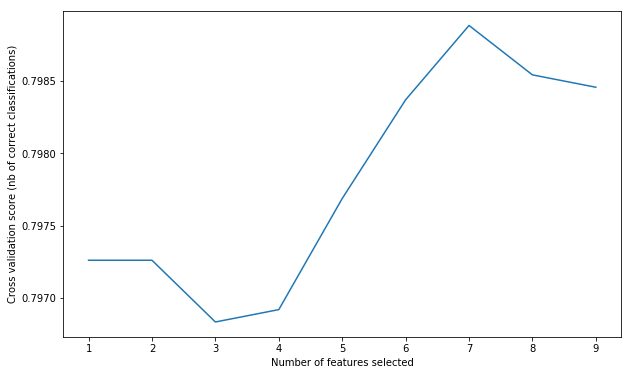

Optimal number of features: 7
Selected features: [ True  True  True  True  True  True False False  True]


In [66]:
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(x, y)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' %  rfecv.support_)

<b>Model</b>

In [60]:
log_regression = LogisticRegression()
log_regression.fit(x_train, y_train)

yhat = log_regression.predict(x_test)
yhat_probability = log_regression.predict_proba(x_test)

<b>Evaluation</b>

In [61]:
print("Train set Accuracy: ", accuracy_score(y_train, log_regression.predict(x_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Train set Accuracy:  0.800321199143469
Test set Accuracy:  0.7922912205567452


In [62]:
log_loss(y_test, yhat_probability)

0.4567074547878627

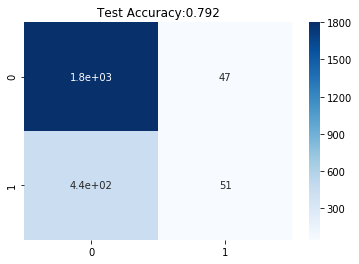

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1846
           1       0.52      0.10      0.17       489

   micro avg       0.79      0.79      0.79      2335
   macro avg       0.66      0.54      0.53      2335
weighted avg       0.74      0.79      0.73      2335



array([[1799,   47],
       [ 438,   51]], dtype=int64)

In [63]:
con_matrix = confusion_matrix(y_test, yhat)

sns.heatmap(con_matrix,
            annot=True,
            cmap="Blues")
plt.title('Test Accuracy:{0:.3f}'.format(accuracy_score(y_test, yhat)))
plt.show()

print (classification_report(y_test, yhat))

con_matrix

[0, 0] True Positive - 1799 não enviar para análise e não foram enviados para análise

[0, 1] True Negative - 47 não enviar para análise que foram enviados para análise

[1, 0] False Positive - 438 enviar para análise que não foram enviados para análise

[1, 1] False Negative - 51 enviar para análise que foram enviados para análise

### Model - Neural Network